# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [1]:
# This code unzip data from external source to the workspace 
import zipfile
import os

main_dir = os.getcwd()
source_zip_file = os.path.join(main_dir, "traffic-signs-data.zip")
dest_dir = os.path.join(main_dir,"traffic-signs-data")
image_save_path = os.path.join(main_dir,"result_images")

if not os.path.exists(image_save_path):
    print(f"Create result image dir {image_save_path}")
    os.mkdir(image_save_path)

if not os.path.exists(dest_dir):
    print(f"Load zip file data to path {dest_dir}")
    with zipfile.ZipFile(source_zip_file,"r") as zip_ref:
        zip_ref.extractall(main_dir)
else:
    print("Already load data, skip this step")

Already load data, skip this step


In [2]:
cleanup_big_data = False
if cleanup_big_data:
    import shutil
    load_existing_files = True
    gtsrb_save_five_file = "./traffic-signs-data/gtsrb_5.p"

    remove_big_data_path_1 = os.path.join(main_dir, "traffic-signs-data/GTSRB_Final_Training_Images")
    remove_big_data_path_2 = os.path.join(main_dir, "traffic-signs-data/GTSRB_Python_code")
    print("Delete recursivly")
    print(remove_big_data_path_1)
    print(remove_big_data_path_2)
    shutil.rmtree(remove_big_data_path_1)
    shutil.rmtree(remove_big_data_path_2)
load_existing_files = False

---
## Step 0: Load The Data

In [3]:
import os
import pickle
import random
import cv2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.utils import shuffle
from skimage.util import random_noise

# Visualizations will be shown in the notebook.from sklearn.utils import shuffle
%matplotlib inline

print(f"Tensoflow version: {tf.__version__}")
assert float(tf.__version__.rsplit(".",1)[0]) < 2 , "Tensorflow must be version 1.x to run this notebook"

test_run = False
preprocess_data = False

C:\Users\SilasUlrich\Anaconda3\envs\IntroToTensorFlow\lib\site-packages\tensorflow\python\framework\dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\SilasUlrich\Anaconda3\envs\IntroToTensorFlow\lib\site-packages\tensorflow\python\framework\dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\SilasUlrich\Anaconda3\envs\IntroToTensorFlow\lib\site-packages\tensorflow\python\framework\dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\SilasUlric

Tensoflow version: 1.3.0


In [4]:
# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file= "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [5]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

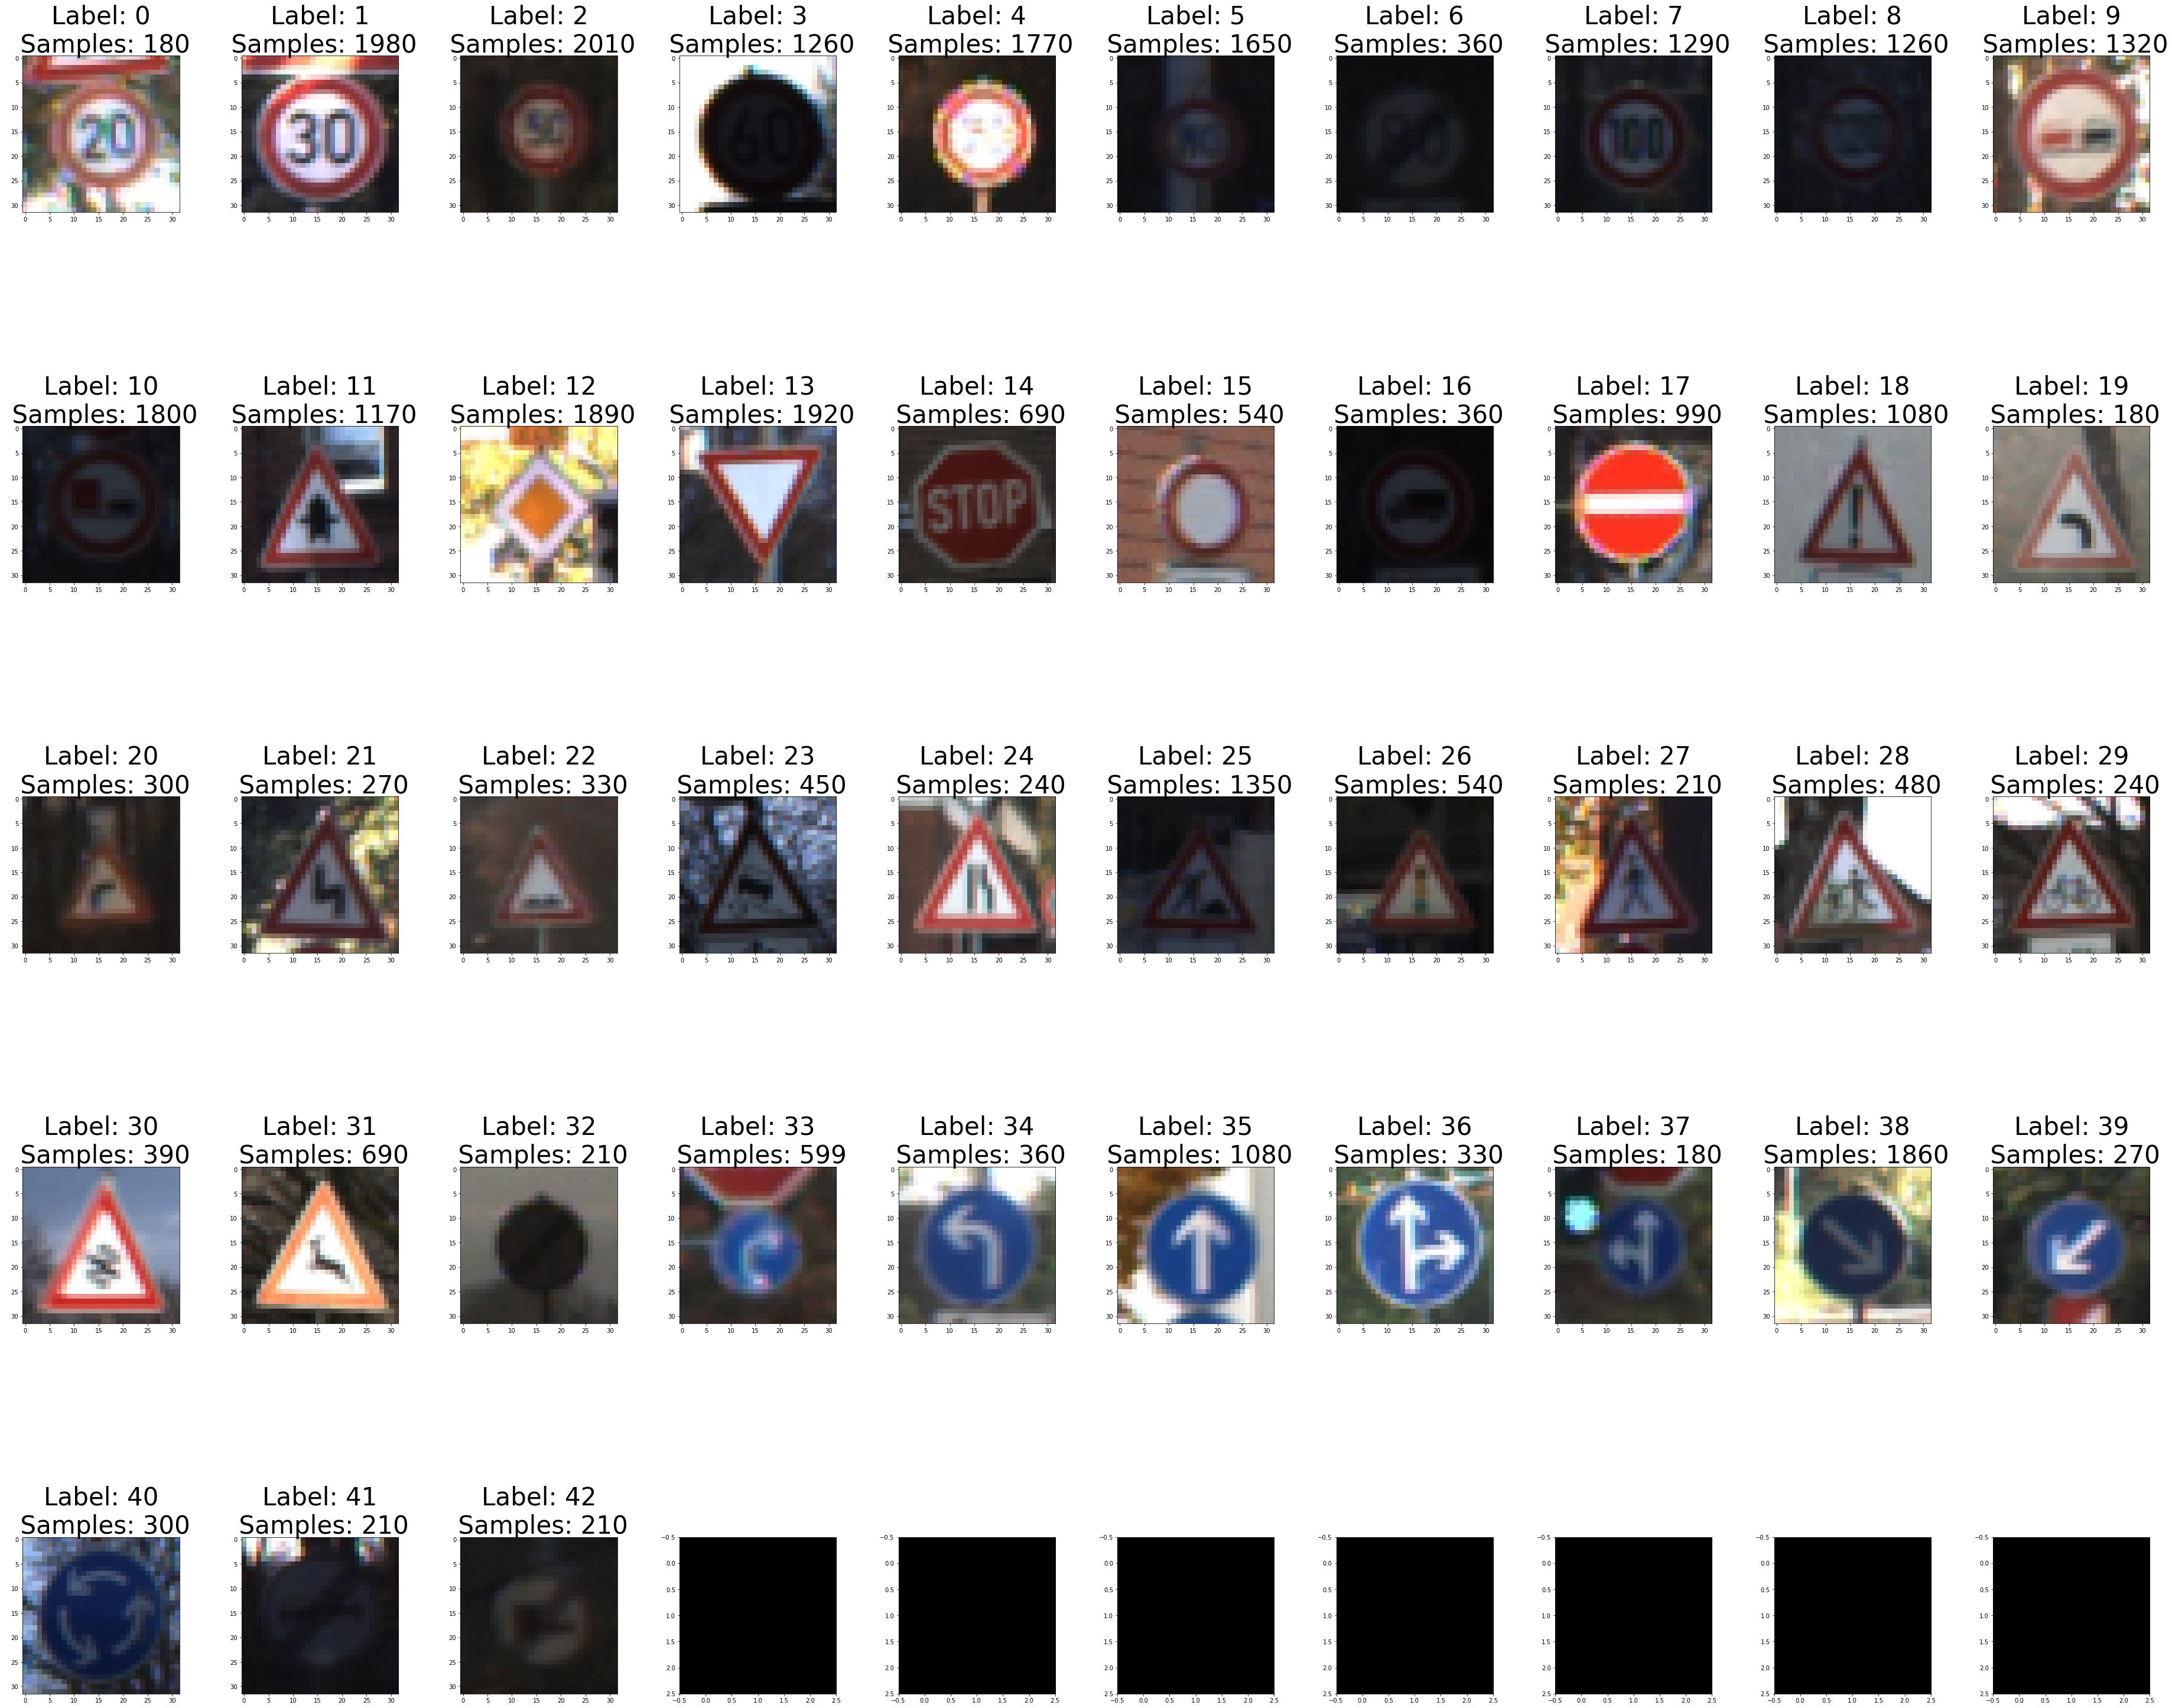

In [6]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.


# show a random pictore for each lable class

unique_labels = np.sort(pd.unique(y_train))
n_img_col = 10
# plotting with subplots
f, axs = plt.subplots(len(unique_labels)//n_img_col +1, n_img_col, figsize=(50,50))
col_counter = 0
row_counter = 0
for unique in unique_labels:
    label_subset = np.where(y_train==unique)[0]
    rand_label_array_ind = random.randint(0, len(label_subset)-1)
    index = label_subset[rand_label_array_ind]
    # print(f"UL : {unique} Rand POs: {rand_label_array_ind} Index : {index}")
    image = X_train[index].squeeze()

    axs[row_counter, col_counter].imshow(image)
    axs[row_counter, col_counter].set_title("Label: " + str(unique) + f"\n Samples: {len(label_subset)}", fontsize=42)

    col_counter += 1
    if col_counter >= n_img_col:
        col_counter = 0
        row_counter += 1

# fill missing images
while col_counter < n_img_col:
    axs[row_counter, col_counter].imshow(np.zeros([3,3,3]))
    col_counter += 1

plt.tight_layout()
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
f.savefig("result_images/input_images_dataset.png")
plt.show()

In [7]:
# Plot number of images per class as bar chart
def plot_number_of_samples_per_class(y_input, save_file):
    unique_elements, counts_elements = np.unique(y_input, return_counts = True)
    plt.bar( np.arange( len(unique_elements) ), counts_elements, align='center' )
    plt.ylabel('Training samples')
    plt.xlabel('Classes')
    plt.xlim([-1, len(unique_elements)])
    plt.savefig(save_file)
    plt.show()


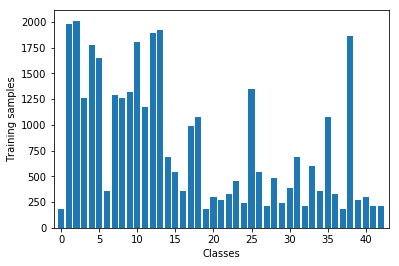

In [8]:
plot_number_of_samples_per_class(y_train, save_file="result_images/sample_counts_classes.png")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [9]:
def rotate_image(image, angle_deg):
    row,col = image.shape[:2]
    image_center=tuple(np.array([row,col])/2)
    rot_mat = cv2.getRotationMatrix2D(image_center,angle_deg,1.0)
    rot_img = cv2.warpAffine(image, rot_mat, (col,row))
    return rot_img

def translate_image(image, x,y):
    row,col = image.shape[:2]
    translation_matrix = np.float32([ [1,0,x], [0,1,y] ])
    return cv2.warpAffine(image, translation_matrix, (col, row))

def data_oversampling_pipe(image, random_factor=False):
    """
    change the image for better generalization
    Add rotation
    Add translation
    :param random_factor: apply a random rotation and translation
    :param image:
    :return: transformed image
    """
    if random_factor:
        flip = 1 if random.randint(0,1) == 1 else -1
        r = random.random() * flip
    else:
        r = 1
    # rotation
    img = rotate_image(image, 10 * r)

    # Translation
    img = translate_image(img, 3*r, 6*r)

    # we dont flip because the signs also flip make it harder to learn letters and numbers on signs
    # flip image horizontal
    # if random_factor and (flip == -1):
    #     img = cv2.flip(image, flipCode=0)

    return img

def data_correction_pipe(image, img_size=(32,32), noise_ratio=0.1):

    # resize image
    resized = cv2.resize(image, img_size)
     #convert to gray
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)/255.

    # noisy = random_noise(gray, mode="s&p", amount=noise_ratio)

    result = np.stack((gray ,)*1, axis=-1)

    return result


def oversample_dataset(X_input, y_input, min_number_records=3000):
    """
    :param min_number_records: Number of samples for each subclass needed
    :param X_input: feature images
    :param y_input: labels
    :return: Updates features , labels
    """

    unique_labels = np.sort(np.unique(y_input))
    for class_label in unique_labels:
        label_subset = np.where(y_input==class_label)[0]

        missing_samples = min_number_records - len(label_subset)
        if missing_samples > 0:
            print(f"[Class {class_label}] Need additional {missing_samples} images")
            print("Create sample patch from original data")
            while True:
                print(f"Process images. {missing_samples} samples remain")
                for data in X_input[label_subset][:missing_samples]:
                    new_data = data_oversampling_pipe(data, random_factor=True)
                    X_input = np.concatenate((X_input, [new_data]))
                    y_input = np.concatenate((y_input, [class_label]))
                    missing_samples = missing_samples - 1
                if missing_samples <= 0:
                    break
    return X_input, y_input

def preprocess_image_data(X_input):
    """
    Process pipe (resize -> normaize [0,1] --> noise --> gray --> shift to zero centered
    :param X_input:
    :return:
    """
    X_output = list()
    print(f"Preprocess {len(X_input)} images")
    for pos ,data in enumerate(X_input):
        result = data_correction_pipe(data)
        X_output.append(result)
    result = np.asarray(X_output)
    return result - 0.5



In [10]:
def image_transformation_sample(X_input, y_input, save_file, transformed=False, gray=False, gray_scale=(0,255), signnames_file="./signnames.csv"):
    # load sign names
    sign_names = pd.read_csv(signnames_file).iloc[:,1].to_dict()
    unique_labels = pd.read_csv(signnames_file).iloc[:,0].astype(int)
    n_img_col = 10
    # plotting with subplots
    f, axs = plt.subplots(len(unique_labels)//n_img_col +1, n_img_col, figsize=(160,160))
    col_counter = 0
    row_counter = 0
    for unique in unique_labels:
        print(f"Take image for {unique} - {sign_names[unique]}", end="")
        label_subset = np.where(y_input.astype(int)==unique)[0]
        if len(label_subset) > 0:
            rand_label_array_ind = random.randint(0, len(label_subset)-1)
            index = label_subset[rand_label_array_ind]
            print(f"UL : {unique} Rand POs: {rand_label_array_ind} Index : {index}")
            image = X_input[index].squeeze()
            if transformed:
                image = data_oversampling_pipe(image, random_factor=True)
            print("")
        else:
            print(" > No data for")
            image = np.zeros([3,3,3])
        if gray:
            axs[row_counter, col_counter].imshow(image, cmap='gray', vmin=gray_scale[0], vmax=gray_scale[1])
        else:
            axs[row_counter, col_counter].imshow(image)
        axs[row_counter, col_counter].set_title(f"Label {unique}\n{sign_names[unique]}\n Samples:{len(label_subset)}" , fontsize=50)

        col_counter += 1
        if col_counter >= n_img_col:
            col_counter = 0
            row_counter += 1

    # fill missing images
    while col_counter < n_img_col:
        axs[row_counter, col_counter].imshow(np.zeros([3,3,3]))
        col_counter += 1

    plt.tight_layout()
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.savefig(save_file)
    plt.show()

In [11]:
image_transformation_sample(X_train, y_train, transformed=True,  gray=True, save_file="result_images/image_transformations.png")

Take image for 0 - Speed limit (20km/h)UL : 0 Rand POs: 20 Index : 9980

Take image for 1 - Speed limit (30km/h)UL : 1 Rand POs: 834 Index : 3054

Take image for 2 - Speed limit (50km/h)UL : 2 Rand POs: 1393 Index : 32832

Take image for 3 - Speed limit (60km/h)UL : 3 Rand POs: 18 Index : 5388

Take image for 4 - Speed limit (70km/h)UL : 4 Rand POs: 1641 Index : 8451

Take image for 5 - Speed limit (80km/h)UL : 5 Rand POs: 312 Index : 12672

Take image for 6 - End of speed limit (80km/h)UL : 6 Rand POs: 160 Index : 21610

Take image for 7 - Speed limit (100km/h)UL : 7 Rand POs: 208 Index : 23938

Take image for 8 - Speed limit (120km/h)UL : 8 Rand POs: 636 Index : 16506

Take image for 9 - No passingUL : 9 Rand POs: 790 Index : 11830

Take image for 10 - No passing for vehicles over 3.5 metric tonsUL : 10 Rand POs: 1353 Index : 18483

Take image for 11 - Right-of-way at the next intersectionUL : 11 Rand POs: 759 Index : 9339

Take image for 12 - Priority roadUL : 12 Rand POs: 1248 Inde

# Image oversampling and pre processing

In [12]:
if preprocess_data:
    X_train, y_train =  oversample_dataset(X_train, y_train, min_number_records=4000 if not test_run else 500)

    plot_number_of_samples_per_class(y_train, save_file="result_images/oversample_sample_counts_classes.png")

In [13]:
if preprocess_data:
    # run preprocess pipe
    X_train = preprocess_image_data(X_train)
    X_test = preprocess_image_data(X_test)
    X_valid = preprocess_image_data(X_valid)

In [41]:
if preprocess_data:
    image_transformation_sample(X_train, y_train, gray=True, gray_scale=(-0.5, 0.5), save_file="result_images/image_transformations_grey.png")


# Save or Load old processed data

In [42]:
# Save to pickel file for later testing

def save_to_pickle_file(save_file: str, data):
    print("[Saving] To file {}".format(save_file))
    if os.path.exists(save_file):
        print("[Warning] Overwrite old pickle file!")
        os.remove(save_file)
    with open(save_file, 'ab') as f:
        pickle.dump(data, f)

def load_from_pickle_file(load_file : str):
    print(f"[Loading] Try to load {load_file}")
    if os.path.exists(load_file):
        with open(load_file, 'rb') as file:
            print("[Loading] Found file storage. Load existing one")
            return pickle.loads(file.read())
    print("[Loading] Failed!")

In [43]:
if preprocess_data:
    training_file_processed = "./traffic-signs-data/train_prc.p"
    validation_file_processed= "./traffic-signs-data/test_prc.p"
    testing_file_processed = "./traffic-signs-data/valid_prc.p"

    save_to_pickle_file(training_file_processed, [X_train, y_train])
    save_to_pickle_file(validation_file_processed, [X_valid, y_valid])
    save_to_pickle_file(testing_file_processed, [X_test, y_test])

In [44]:
training_file_processed = "./traffic-signs-data/train_prc.p"
validation_file_processed= "./traffic-signs-data/test_prc.p"
testing_file_processed = "./traffic-signs-data/valid_prc.p"

X_train, y_train = load_from_pickle_file(training_file_processed)
X_valid, y_valid =load_from_pickle_file(validation_file_processed)
X_test, y_test =load_from_pickle_file(testing_file_processed)

[Loading] Try to load ./traffic-signs-data/train_prc.p
[Loading] Found file storage. Load existing one
[Loading] Try to load ./traffic-signs-data/test_prc.p
[Loading] Found file storage. Load existing one
[Loading] Try to load ./traffic-signs-data/valid_prc.p
[Loading] Found file storage. Load existing one


### Model Architecture

In [45]:
def flattening_layer(input, output_size):
    return tf.reshape(input, [-1, output_size])


def fully_connected(input, input_size, output_size, mu, sigma):
    fc1_W = tf.Variable(tf.truncated_normal(shape=(input_size, output_size), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(output_size))
    return tf.matmul(input, fc1_W) + fc1_b


In [46]:
def LeNet(x, class_n=10, dropout_keep=1.):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1

    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    l1_out_depth = 6
    x = tf.nn.conv2d(x, 
                     filter=tf.Variable(tf.truncated_normal((5, 5, 1, l1_out_depth))), 
                     strides=[1, 1, 1, 1], 
                     padding='VALID') + tf.Variable(tf.zeros(l1_out_depth))

    # TODO: Activation.
    x = tf.nn.relu(x)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    x = tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    l2_out_depth = 16
    x = tf.nn.conv2d(x, 
                     filter=tf.Variable(tf.truncated_normal((5, 5, l1_out_depth, l2_out_depth))), 
                     strides=[1, 1, 1, 1], 
                     padding='VALID') +  tf.Variable(tf.zeros(l2_out_depth))

    # TODO: Activation.
    x =  tf.nn.relu(x)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    x = tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    x = flattening_layer(x, 400)

    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    x = fully_connected(x, 400, 120, mu, sigma)
    x = tf.nn.dropout(x, keep_prob=dropout_keep)
    
    # TODO: Activation.
    x = tf.nn.relu(x)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    x = fully_connected(x, 120, 84, mu, sigma)
    x = tf.nn.dropout(x, keep_prob=dropout_keep)
    
    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    logits = fully_connected(x, 84, class_n, mu, sigma)

    return logits

In [47]:

def ParallelNet(x, class_n=10, dropout_keep=0.3):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    dropout_rate = 1 - dropout_keep

    # TODO: Layer 1: Convolutional 32x32 -> 28x28
    # 3x convolution with 1x1, 3x3, 5x5 filter
    # concat all layer together = 3x out dim
    l1_depth = 2
    l1_1 = tf.nn.conv2d(input=x,
                     filter=tf.Variable(tf.truncated_normal((5, 5, 1, l1_depth))),
                     strides=[1,1,1,1],
                     padding='VALID') + tf.Variable(tf.zeros(l1_depth))
    l1_2 = tf.nn.conv2d(input=x,
                     filter=tf.Variable(tf.truncated_normal((3, 3, 1, l1_depth))),
                     strides=[1,1,1,1],
                     padding='VALID') + tf.Variable(tf.zeros(l1_depth))
    l1_3 = tf.nn.conv2d(input=x,
                     filter=tf.Variable(tf.truncated_normal((1, 1, 1, l1_depth))),
                     strides=[1,1,1,1],
                     padding='VALID') + tf.Variable(tf.zeros(l1_depth))
    # TODO: Activation.
    l1_1 = tf.nn.relu(l1_1)
    l1_2 = tf.nn.relu(l1_2)
    l1_3 = tf.nn.relu(l1_3)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    # TODO: Pooling. Input = 30x30x6. Output = 14x14x6.
    # TODO: Pooling. Input = 32x32x6. Output = 14x14x6.
    l1_1 = tf.nn.max_pool(l1_1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    l1_2 = tf.nn.max_pool(l1_2, ksize=[1,4,4,1], strides=[1,2,2,1], padding='VALID')
    l1_3 = tf.nn.max_pool(l1_3, ksize=[1,6,6,1], strides=[1,2,2,1], padding='VALID')

    # l1_out = tf.concat([l1_1, l1_2, l1_3], 0)

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    l2_depth = 4
    in_depth = l1_depth
    l2_1 = tf.nn.conv2d(input=l1_1,
                     filter=tf.Variable(tf.truncated_normal((5, 5, in_depth, l2_depth))),
                     strides=[1,1,1,1],
                     padding='VALID') + tf.Variable(tf.zeros(l2_depth))
    l2_2 = tf.nn.conv2d(input=l1_2,
                     filter=tf.Variable(tf.truncated_normal((3, 3, in_depth, l2_depth))),
                     strides=[1,1,1,1],
                     padding='VALID') + tf.Variable(tf.zeros(l2_depth))
    l2_3 = tf.nn.conv2d(input=l1_3,
                     filter=tf.Variable(tf.truncated_normal((1, 1, in_depth, l2_depth))),
                     strides=[1,1,1,1],
                     padding='VALID') + tf.Variable(tf.zeros(l2_depth))
   # TODO: Activation.
    l2_1 = tf.nn.relu(l2_1)
    l2_2 = tf.nn.relu(l2_2)
    l2_3 = tf.nn.relu(l2_3)

    # TODO: Pooling. Input = 14x14x24. Output = 5x5x24.
    l2_1 = tf.nn.max_pool(l2_1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    l2_2 = tf.nn.max_pool(l2_2, ksize=[1,4,4,1], strides=[1,2,2,1], padding='VALID')
    l2_3 = tf.nn.max_pool(l2_3, ksize=[1,6,6,1], strides=[1,2,2,1], padding='VALID')

    l2_out = tf.concat([l2_1, l2_2, l2_3], 3)
    
    l2_dims = l2_depth * 3 * 25

    # TODO: Flatten. Input = 5x5x24. Output = 400.
    print("Layer 2 shape")
    print(l2_out.shape)
    print(l2_out)
    fc1 = flattening_layer(l2_out, l2_dims)
    print("FC 1")
    print(fc1.shape)
    # TODO: Layer 3: Fully Connected.
    fc1 = fully_connected(fc1, l2_dims, 180, mu, sigma)
    fc1 = tf.nn.dropout(fc1, keep_prob=dropout_keep)

    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected.
    fc2 = fully_connected(fc1, 180, 84, mu, sigma)
    fc2 = tf.nn.dropout(fc2, keep_prob=dropout_keep)
    print("FC 2")
    print(fc2.shape)
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)

    # TODO: Layer 5: Fully Connected.
    logit_out = fully_connected(fc2, 84, class_n, mu, sigma)
    print("Logit out")
    print(logit_out.shape)
    return logit_out


In [48]:

def BlockNet(x, class_n=10, dropout_keep=0.3):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    dropout_rate = 1 - dropout_keep

    # TODO: Layer 1: Convolutional 32x32 -> 28x28
    # 3x convolution with 1x1, 3x3, 5x5 filter
    # concat all layer together = 3x out dim
    l1_depth = 2
    l1_1 = tf.nn.conv2d(input=x,
                     filter=tf.Variable(tf.truncated_normal((5, 5, 1, l1_depth))),
                     strides=[1,1,1,1],
                     padding='VALID') + tf.Variable(tf.zeros(l1_depth))
    l1_2 = tf.nn.conv2d(input=x,
                     filter=tf.Variable(tf.truncated_normal((3, 3, 1, l1_depth))),
                     strides=[1,1,1,1],
                     padding='VALID') + tf.Variable(tf.zeros(l1_depth))
    l1_3 = tf.nn.conv2d(input=x,
                     filter=tf.Variable(tf.truncated_normal((1, 1, 1, l1_depth))),
                     strides=[1,1,1,1],
                     padding='VALID') + tf.Variable(tf.zeros(l1_depth))
    # TODO: Activation.
    l1_1 = tf.nn.relu(l1_1)
    l1_2 = tf.nn.relu(l1_2)
    l1_3 = tf.nn.relu(l1_3)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    # TODO: Pooling. Input = 30x30x6. Output = 14x14x6.
    # TODO: Pooling. Input = 32x32x6. Output = 14x14x6.
    l1_1 = tf.nn.max_pool(l1_1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    l1_2 = tf.nn.max_pool(l1_2, ksize=[1,4,4,1], strides=[1,2,2,1], padding='VALID')
    l1_3 = tf.nn.max_pool(l1_3, ksize=[1,6,6,1], strides=[1,2,2,1], padding='VALID')

    l1_out = tf.concat([l1_1, l1_2, l1_3], 3)
    print("L1 shape")
    print(l1_out.shape)

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    l2_depth = l1_depth * 3 * 2
    in_depth = l1_depth * 3
    l2_1 = tf.nn.conv2d(input=l1_out,
                     filter=tf.Variable(tf.truncated_normal((5, 5, in_depth, l2_depth))),
                     strides=[1,1,1,1],
                     padding='VALID') + tf.Variable(tf.zeros(l2_depth))
    l2_2 = tf.nn.conv2d(input=l1_out,
                     filter=tf.Variable(tf.truncated_normal((3, 3, in_depth, l2_depth))),
                     strides=[1,1,1,1],
                     padding='VALID') + tf.Variable(tf.zeros(l2_depth))
    l2_3 = tf.nn.conv2d(input=l1_out,
                     filter=tf.Variable(tf.truncated_normal((1, 1, in_depth, l2_depth))),
                     strides=[1,1,1,1],
                     padding='VALID') + tf.Variable(tf.zeros(l2_depth))
   # TODO: Activation.
    l2_1 = tf.nn.relu(l2_1)
    l2_2 = tf.nn.relu(l2_2)
    l2_3 = tf.nn.relu(l2_3)

    # TODO: Pooling. Input = 14x14x24. Output = 5x5x24.
    l2_1 = tf.nn.max_pool(l2_1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    l2_2 = tf.nn.max_pool(l2_2, ksize=[1,4,4,1], strides=[1,2,2,1], padding='VALID')
    l2_3 = tf.nn.max_pool(l2_3, ksize=[1,6,6,1], strides=[1,2,2,1], padding='VALID')

    l2_out = tf.concat([l2_1, l2_2, l2_3], 3)

    l2_dims = l2_depth * 3 * 25

    # TODO: Flatten. Input = 5x5x24. Output = 400.
    print("Layer 2 shape")
    print(l2_out.shape)
    print(l2_out)
    fc1 = flattening_layer(l2_out, l2_dims)
    print("FC 1")
    print(fc1.shape)
    # TODO: Layer 3: Fully Connected.
    fc1 = fully_connected(fc1, l2_dims, 256, mu, sigma)
    fc1 = tf.nn.dropout(fc1, keep_prob=dropout_keep)

    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected.
    fc2 = fully_connected(fc1, 256, 128, mu, sigma)
    fc2 = tf.nn.dropout(fc2, keep_prob=dropout_keep)
    print("FC 2")
    print(fc2.shape)
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)

    # TODO: Layer 5: Fully Connected.
    logit_out = fully_connected(fc2, 128, class_n, mu, sigma)
    print("Logit out")
    print(logit_out.shape)
    return logit_out


In [49]:
# setup tf vars
x = tf.placeholder(tf.float32, (None, image_shape[0], image_shape[1], 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)

In [50]:
# Train net
rate = 0.001
# model_name = "Blocknet"
# model_name = "Parallelnet"
model_name = "Leenet"
logits = LeNet(x, class_n=n_classes, dropout_keep=keep_prob)
# logits = ParallelNet(x, class_n=n_classes, dropout_keep=keep_prob)
# logits = BlockNet(x, class_n=n_classes, dropout_keep=keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Train, Validate and Test the Model

In [51]:
BATCH_SIZE = 32
EPOCHS = 200 if not test_run else 10
dropout_keep = 0.5

In [52]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.7})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [53]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    loss_storage = []
    best_accuracy = 0.
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout_keep})

        print("Validate")
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        if validation_accuracy > best_accuracy:
            best_accuracy = validation_accuracy
            if validation_accuracy > 0.9:
                    saver.save(sess, f"./{model_name}", global_step=i)
        loss_storage.append(validation_accuracy)
    if best_accuracy < 0.9:
            saver.save(sess, f"./{model_name}", global_step=i)
    print(f"Model saved with best accuracy of {np.round(best_accuracy*100,2)}")


Training...

Validate
EPOCH 1 ...
Validation Accuracy = 0.564

Validate
EPOCH 2 ...
Validation Accuracy = 0.662

Validate
EPOCH 3 ...
Validation Accuracy = 0.722

Validate
EPOCH 4 ...
Validation Accuracy = 0.762

Validate
EPOCH 5 ...
Validation Accuracy = 0.799

Validate
EPOCH 6 ...
Validation Accuracy = 0.814

Validate
EPOCH 7 ...
Validation Accuracy = 0.833

Validate
EPOCH 8 ...
Validation Accuracy = 0.841

Validate
EPOCH 9 ...
Validation Accuracy = 0.831

Validate
EPOCH 10 ...
Validation Accuracy = 0.846

Validate
EPOCH 11 ...
Validation Accuracy = 0.873

Validate
EPOCH 12 ...
Validation Accuracy = 0.863

Validate
EPOCH 13 ...
Validation Accuracy = 0.872

Validate
EPOCH 14 ...
Validation Accuracy = 0.860

Validate
EPOCH 15 ...
Validation Accuracy = 0.879

Validate
EPOCH 16 ...
Validation Accuracy = 0.883

Validate
EPOCH 17 ...
Validation Accuracy = 0.885

Validate
EPOCH 18 ...
Validation Accuracy = 0.890

Validate
EPOCH 19 ...
Validation Accuracy = 0.896

Validate
EPOCH 20 ...
Valid

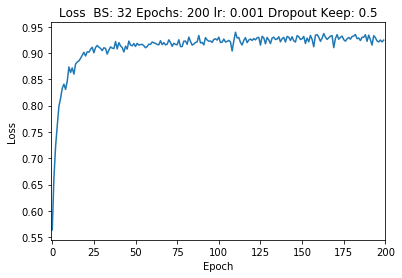

In [54]:
plt.plot(range(0,len(loss_storage)), loss_storage)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title(f"Loss  BS: {BATCH_SIZE} Epochs: {EPOCHS} lr: {rate} Dropout Keep: {dropout_keep}")
plt.xlim([-1, len(loss_storage)])
plt.savefig(f"result_images/train_loss_model_{model_name}_bs{BATCH_SIZE}_ep{EPOCHS}_lt{rate}_dk{dropout_keep}.png")
plt.show()

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [55]:
### Evaluation
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\Leenet-110
Test Accuracy = 0.892


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [56]:
load_existing_files = True
if not load_existing_files:
    gtsrb_save_five_file = "./traffic-signs-data/gtsrb_5.p"
    # this will not be included in the udacity repo cause of size
    # python script for reading the GTSRB image dataset from https://benchmark.ini.rub.de/gtsrb_dataset.html with additional size adjustments and python3 supp
    from readTrafficSigns import readTrafficSigns

    gtsrb_images, gtsrb_labels = readTrafficSigns("./traffic-signs-data/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/")
    # convert data to a pipeline readable format
    gtsrb_labels = np.array(gtsrb_labels).reshape(-1)
    gtsrb_images = np.asarray(gtsrb_images)
    image_transformation_sample(gtsrb_images, gtsrb_labels, save_file="result_images/gtsrb_image_transformations.png")
    # shuffle and take 5
    gtsrb_images, gtsrb_labels = shuffle(gtsrb_images, gtsrb_labels)
    gtsrb_images_subset = gtsrb_images[:5]
    gtsrb_labels_subset = gtsrb_labels[:5]
    save_to_pickle_file(gtsrb_save_five_file, [gtsrb_images_subset, gtsrb_labels_subset])

In [57]:
if load_existing_files:
    gtsrb_save_five_file = "./traffic-signs-data/gtsrb_5.p"
    gtsrb_images_subset ,gtsrb_labels_subset = load_from_pickle_file(gtsrb_save_five_file)

[Loading] Try to load ./traffic-signs-data/gtsrb_5.p
[Loading] Found file storage. Load existing one


In [58]:
gtsrb_images_subset = preprocess_image_data(gtsrb_images_subset)

Preprocess 5 images


In [59]:
print(gtsrb_images_subset.shape)
print(gtsrb_images_subset[0].shape)
print(gtsrb_images_subset[0].min())
print(gtsrb_images_subset[0].max())

(5, 32, 32, 1)
(32, 32, 1)
-0.45294117647058824
0.3313725490196079


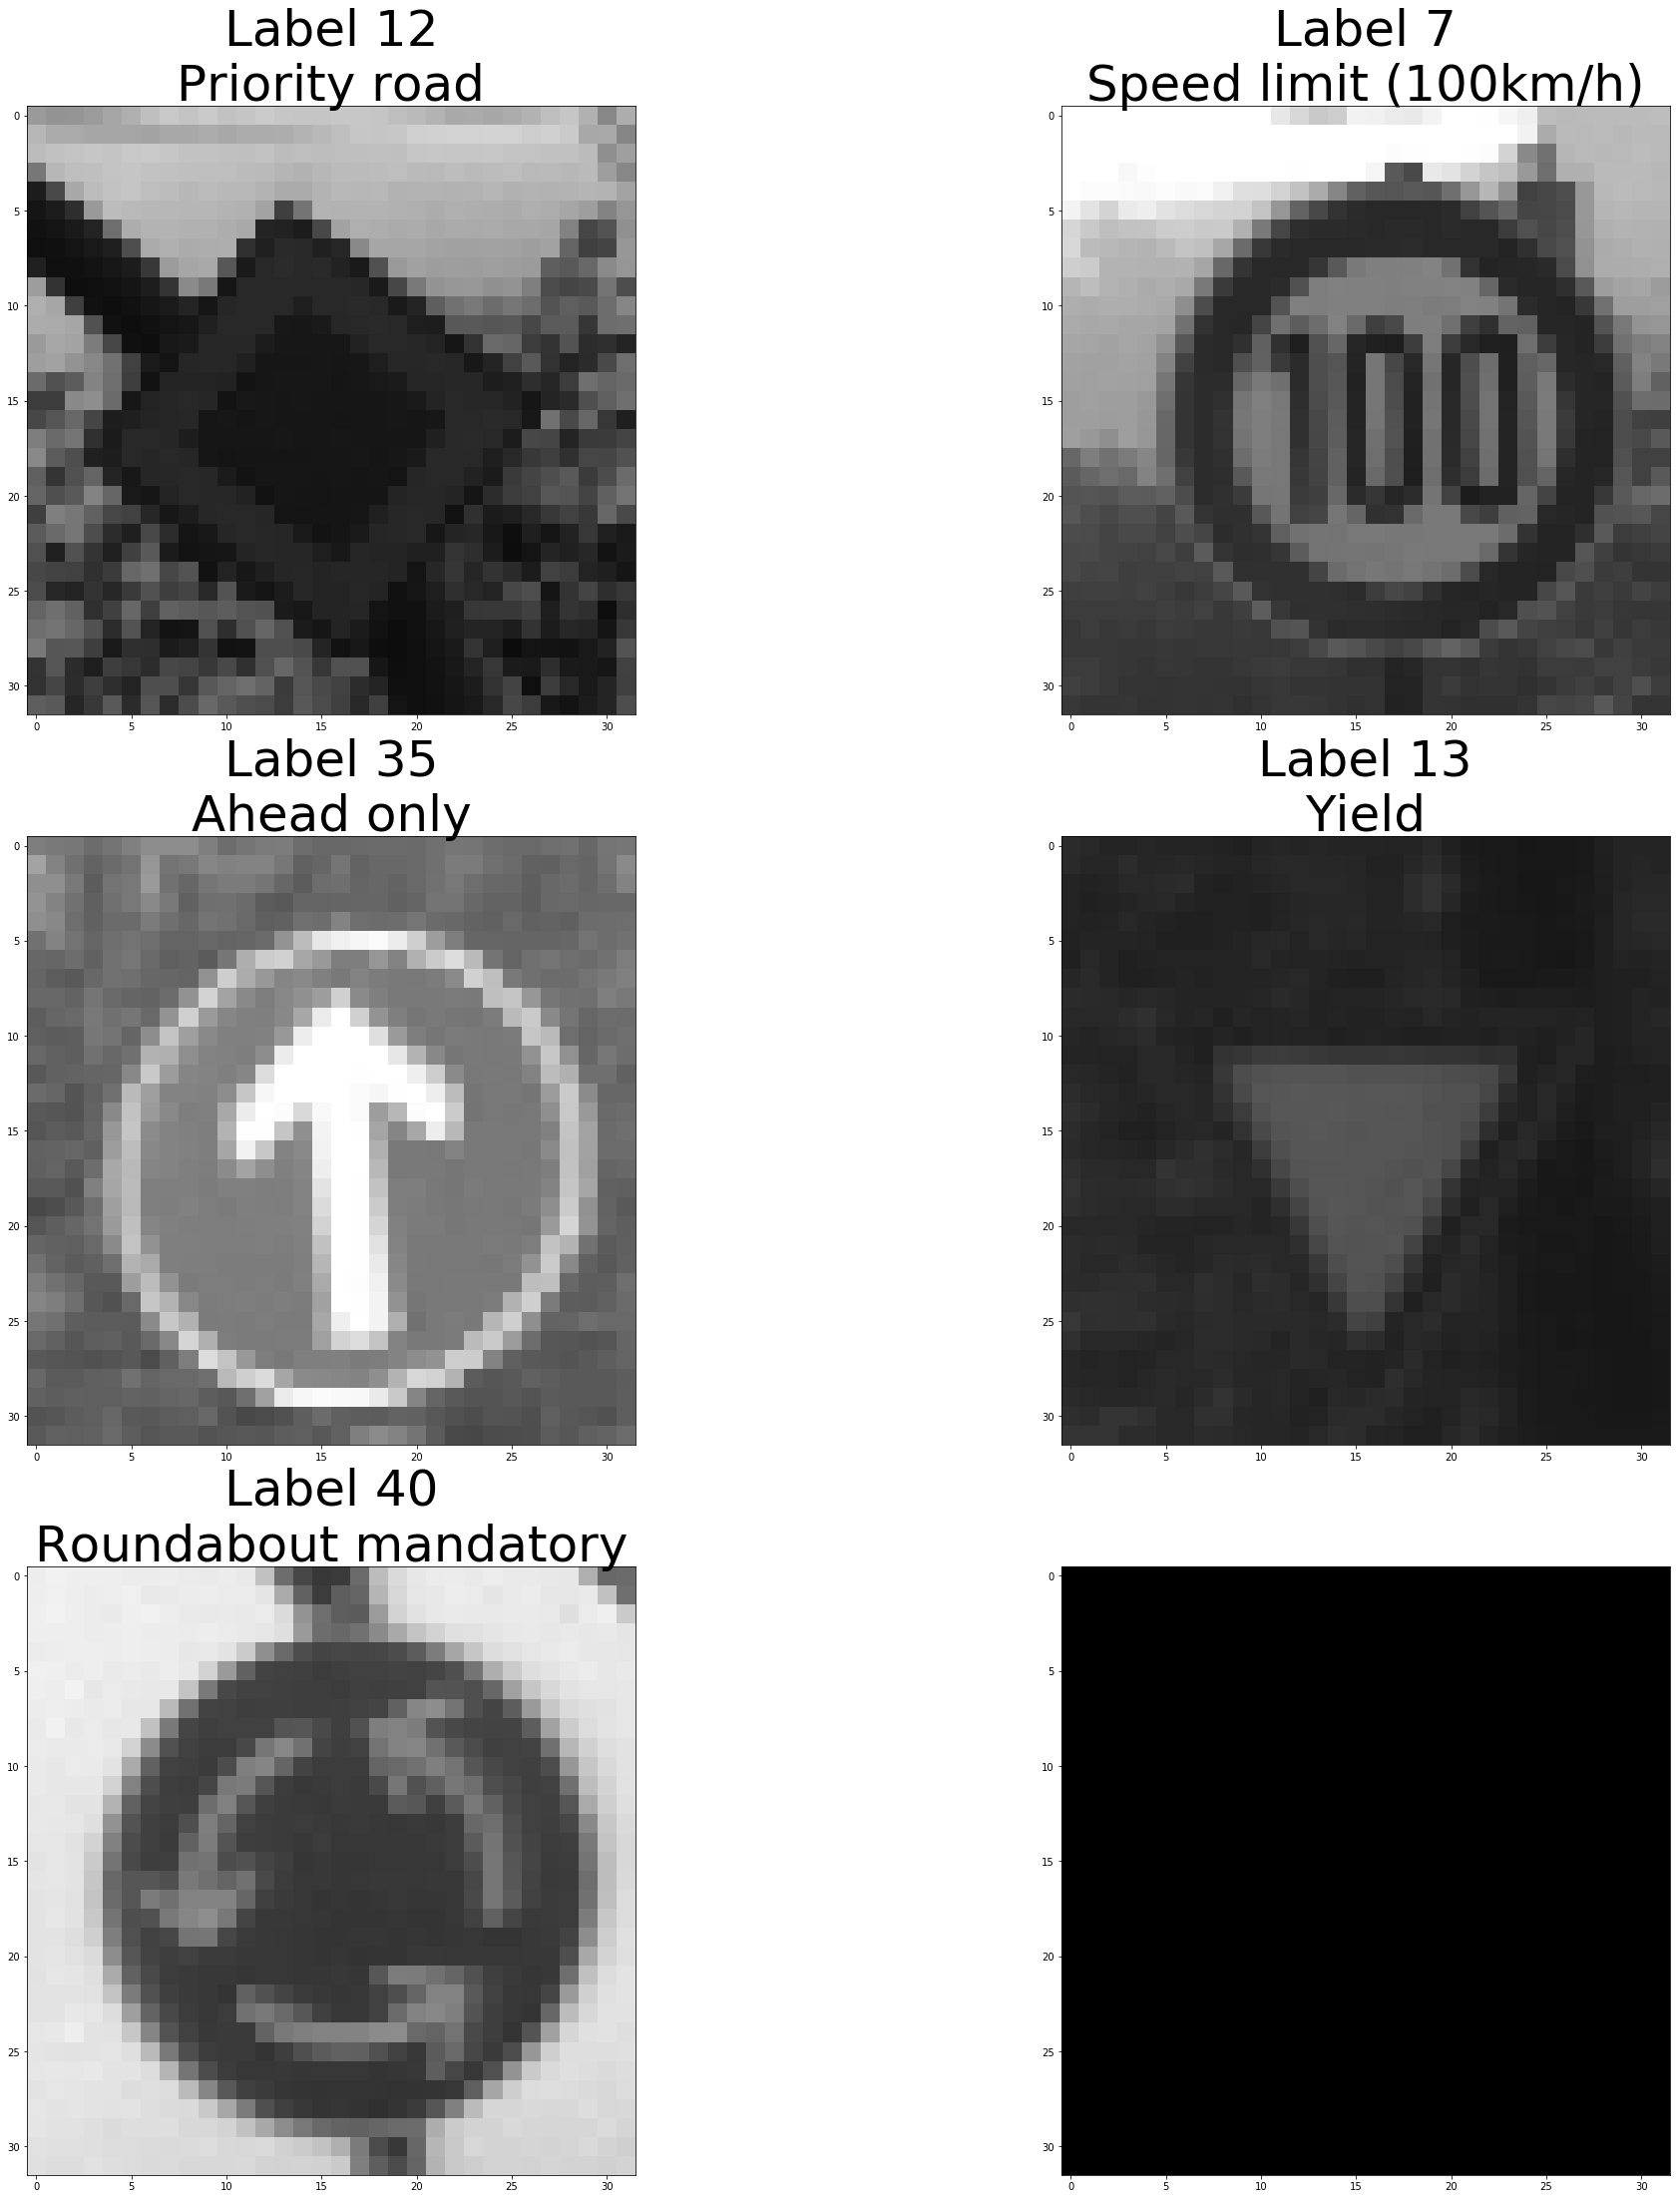

In [60]:
sign_names = pd.read_csv("./signnames.csv").iloc[:,1].to_dict()

# print images
f, axs = plt.subplots(3,2, figsize=(32,32))
axs[0,0].imshow(gtsrb_images_subset[0].squeeze(), cmap='gray', vmin=-0.5, vmax=0.5)
axs[0,0].set_title(f"Label {gtsrb_labels_subset[0]}\n{sign_names[int(gtsrb_labels_subset[0])]}" , fontsize=50)
axs[0,1].imshow(gtsrb_images_subset[1].squeeze(), cmap='gray', vmin=-0.5, vmax=0.5)
axs[0,1].set_title(f"Label {gtsrb_labels_subset[1]}\n{sign_names[int(gtsrb_labels_subset[1])]}" , fontsize=50)
axs[1,0].imshow(gtsrb_images_subset[2].squeeze(), cmap='gray', vmin=-0.5, vmax=0.5)
axs[1,0].set_title(f"Label {gtsrb_labels_subset[2]}\n{sign_names[int(gtsrb_labels_subset[2])]}" , fontsize=50)
axs[1,1].imshow(gtsrb_images_subset[3].squeeze(), cmap='gray', vmin=-0.5, vmax=0.5)
axs[1,1].set_title(f"Label {gtsrb_labels_subset[3]}\n{sign_names[int(gtsrb_labels_subset[3])]}" , fontsize=50)
axs[2,0].imshow(gtsrb_images_subset[4].squeeze(), cmap='gray', vmin=-0.5, vmax=0.5)
axs[2,0].set_title(f"Label {gtsrb_labels_subset[4]}\n{sign_names[int(gtsrb_labels_subset[4])]}" , fontsize=50)
axs[2,1].imshow(np.zeros((32,32,3)), cmap='gray')
plt.tight_layout()
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.savefig("./result_images/gtsrb_five_images")
plt.show()

### Predict the Sign Type for Each Image

In [61]:
# cross_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
# accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
# loss_operation = tf.reduce_mean(cross_entropy)

test_preds = tf.nn.softmax(logits)
test_correct_preds = tf.equal(tf.argmax(test_preds, 1), tf.cast(y[0], tf.int64))
test_accuracy = tf.cast(test_correct_preds, tf.float32)
test_top_five_preds = tf.nn.top_k(test_preds, 5)

def predict_new_data(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    results = {}
    for offset in range(0, num_examples, 1):
        batch_x, batch_y = np.expand_dims(X_data[offset], axis=0), np.expand_dims(np.stack((y_data[offset] ,)*1, axis=-1),axis=0)
        print(f"Image with label {batch_y[0]}")
        (logit_result, accuracy, top_five_preds,) = sess.run([logits, test_accuracy, test_top_five_preds], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
        results[str(offset)] = [logit_result, accuracy, top_five_preds]
    return results

### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Run prediction & analyze performance

In [62]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    result = predict_new_data(gtsrb_images_subset, gtsrb_labels_subset)
    total_acc = 0.
    batch = 0
    for data_result in result:
        logit_result, accuracy_result, top_f = result[data_result]
        total_acc += accuracy_result[0]
        print("--------------------------------")
        print(f"Input Label   : {gtsrb_labels_subset[batch]}" )
        print(f"Output Result : {np.argmax(logit_result,1)[0]}" )
        print(f"Top 5  SM     : " , end="\n\t")
        for pos in range(len(gtsrb_images_subset)):
            print("{} - {:.10f}".format(top_f.indices[0][pos], top_f.values[0][pos]), end="\n\t")
        print(f"Accuracy      : {accuracy_result[0]}" )
        batch += 1
    total_acc = total_acc / len(gtsrb_images_subset)
    print("===============================")
    print("Test Accuracy = {:.2f}%".format(total_acc*100))




INFO:tensorflow:Restoring parameters from .\Leenet-110
Image with label ['12']
Image with label ['7']
Image with label ['35']
Image with label ['13']
Image with label ['40']
--------------------------------
Input Label   : 12
Output Result : 12
Top 5  SM     : 
	12 - 1.0000000000
	14 - 0.0000000337
	13 - 0.0000000022
	11 - 0.0000000005
	25 - 0.0000000000
	Accuracy      : 1.0
--------------------------------
Input Label   : 7
Output Result : 7
Top 5  SM     : 
	7 - 1.0000000000
	5 - 0.0000000000
	12 - 0.0000000000
	2 - 0.0000000000
	8 - 0.0000000000
	Accuracy      : 1.0
--------------------------------
Input Label   : 35
Output Result : 35
Top 5  SM     : 
	35 - 1.0000000000
	36 - 0.0000000000
	9 - 0.0000000000
	12 - 0.0000000000
	38 - 0.0000000000
	Accuracy      : 1.0
--------------------------------
Input Label   : 13
Output Result : 13
Top 5  SM     : 
	13 - 1.0000000000
	38 - 0.0000000000
	36 - 0.0000000000
	14 - 0.0000000000
	35 - 0.0000000000
	Accuracy      : 1.0
-----------------

In [63]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [64]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [65]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")